In [1]:
import gdsfactory as gf
from two_point_electrode_array import make_electrode

PosixPath('../output_files/example_gds.gds')

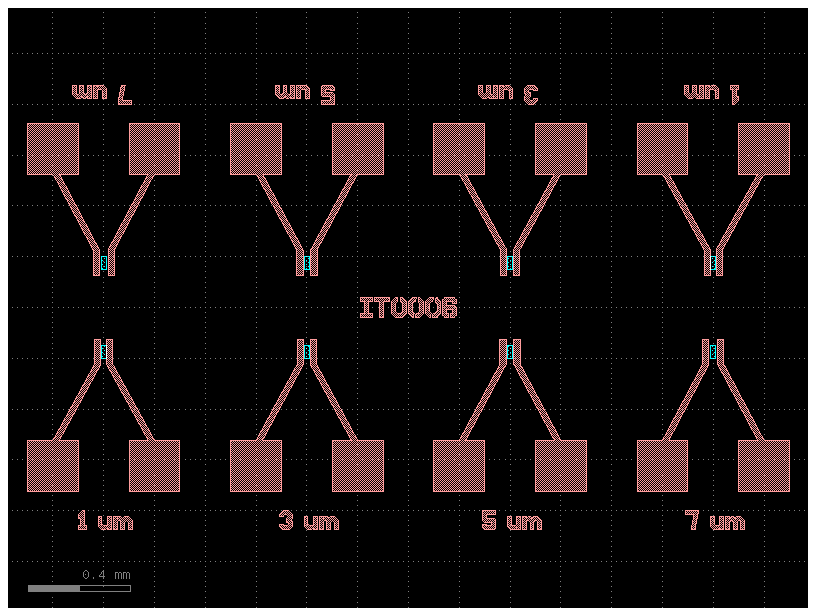

In [2]:
wire_bond_pad = gf.components.rectangle(size=(200, 200), layer=(1, 0))


electrode_group = gf.Component()

gap_um = [1, 3, 5, 7]
vertical_spacing_um = 1000

for i, gap in enumerate(gap_um):
    spacing_um = 20 + 2 * gap
    electrode = make_electrode(spacing_um, edge_overlap_um=-gap, gap_um=gap)
    electrode_group.add_ref(electrode).movex(i * 800)

top = gf.Component()
electrode_group_ref = top.add_ref(electrode_group)

# move electrode group so origin is at center
bbox = electrode_group_ref.bbox()
cx = (bbox.left + bbox.right) / 2
cy = (bbox.top  + bbox.bottom) / 2
electrode_group_ref.move((-cx, -cy))

# add copy of the group rotated 180
electrode_group_ref_2 = top.add_ref(electrode_group)
bbox = electrode_group_ref_2.bbox()
cx = (bbox.left + bbox.right) / 2
cy = (bbox.top  + bbox.bottom) / 2
electrode_group_ref_2.move((-cx, -cy))
electrode_group_ref_2.rotate(180)

electrode_group_ref.movey(-vertical_spacing_um/2)
electrode_group_ref_2.movey(vertical_spacing_um/2)

#####

device = "ITO006"
device_text = gf.components.text(
    text=device,
    size=75,
    layer=(1, 0),
    justify="center",
)
text_ref = top.add_ref(device_text)
(_, text_ymin), (_, text_ymax) = device_text.bbox_np()
text_height = text_ymax - text_ymin
text_ref.move((0, -text_height / 2))

top.plot()
top.write_gds(f"../output_files/example_gds.gds")